In [9]:
import pandas as pd

In [11]:
df = pd.read_csv('enterprise_station.csv')

In [15]:
print(df.head())
print(df.tail())
#Get the shape
print(df.shape)
#Describe the numerical columns
print(df.describe())
#Display column headers with data types
print(df.columns)
print(df.dtypes)
df.to_csv('enterprise_station.csv')


   index     tid                            loc_name loc_number loc_type  \
0      0  103985                    Lihue Kuhio Hwy.     LIHC61     CITY   
1      1  103986                       Lihue Airport     LIHT61  AIRPORT   
2      2  103987  Schofield Barracks (Military Only)     E13651     CITY   
3      3  103988                     Molokai Airport     MKKT71  AIRPORT   
4      4  103989                              Kailua     E13610     CITY   

                    address_1 country               city state  \
0            3-3257 Kuhio Hwy      US              Lihue    HI   
1         3276 Hoolimalima Pl      US              Lihue    HI   
2  694 Mccormack Ave Bldg 694      US  Schofield Barrack    HI   
3    Bldg #2 Airport Loop Mkk      US           Hoolehua    HI   
4             134a Hamakua Dr      US             Kailua    HI   

             phone  postal_code group_branch_number   latitude   longitude  \
0  +1 808-241-5580        96766                36EL  21.990878 -159.

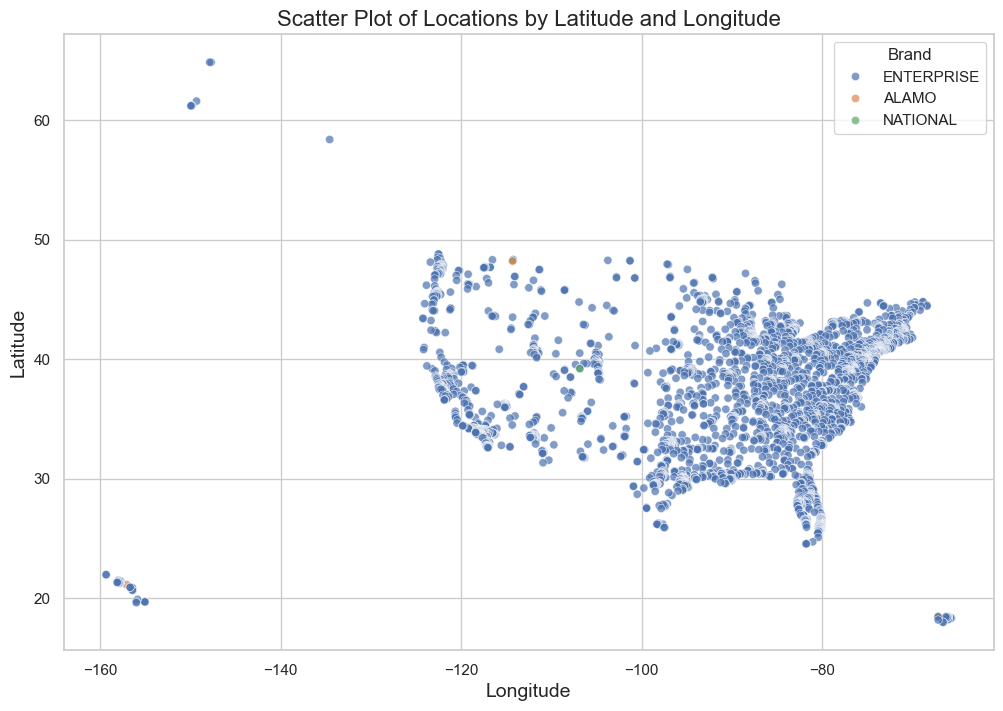

In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('enterprise_station.csv')

# Set the style for the plot
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='brand', alpha=0.7)

# Set the title and labels
plt.title('Scatter Plot of Locations by Latitude and Longitude', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.legend(title='Brand')
plt.grid(True)

# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

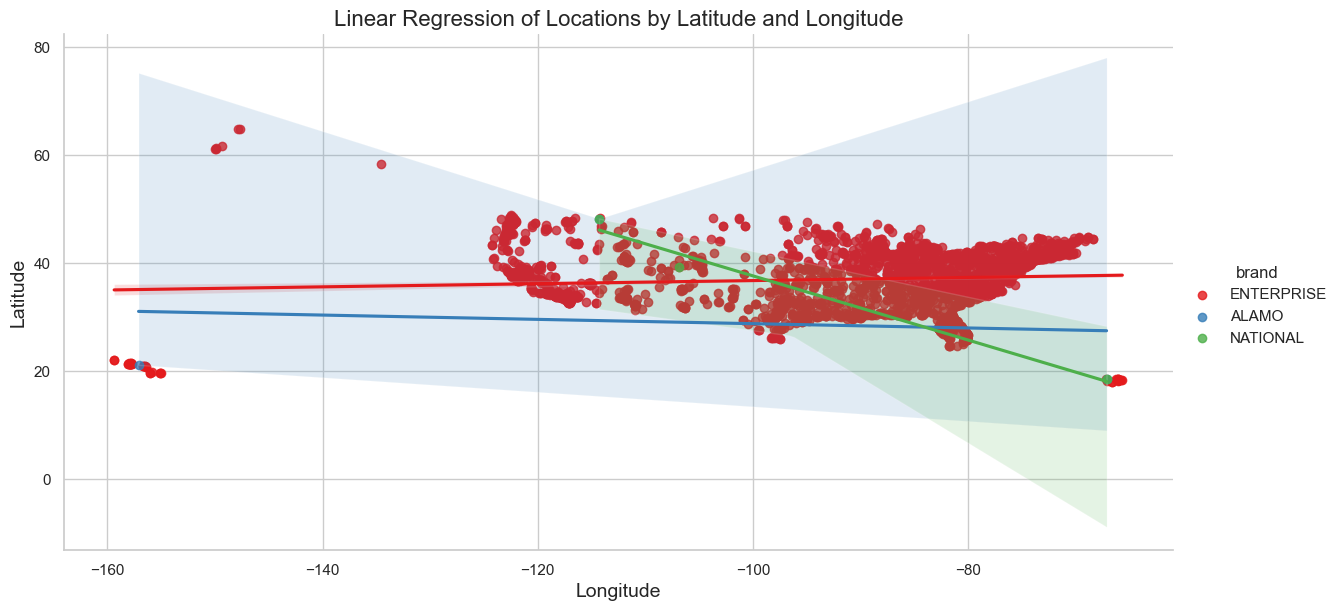

In [19]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('enterprise_station.csv')

# Set the style for the plot
sns.set(style="whitegrid")

# Create a linear regression plot
plt.figure(figsize=(12, 8))
sns.lmplot(data=df, x='longitude', y='latitude', hue='brand', markers='o', palette='Set1', height=6, aspect=2)

# Set the title and labels
plt.title('Linear Regression of Locations by Latitude and Longitude', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

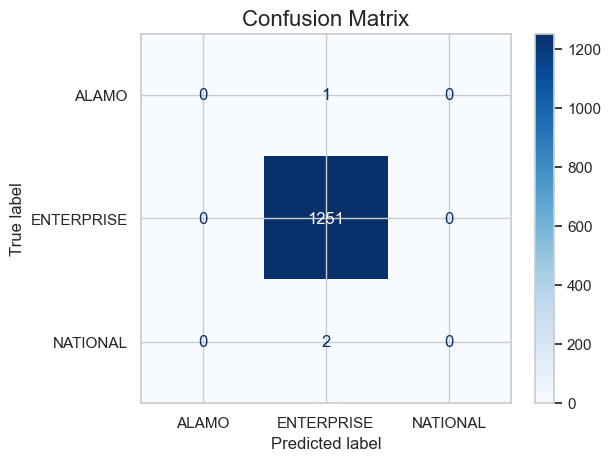

In [21]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the dataset
df = pd.read_csv('enterprise_station.csv')

# Prepare the data (this assumes 'brand' is the target variable)
X = df[['latitude', 'longitude']]  # Features
y = df['brand']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Display the confusion matrix
plt.figure(figsize=(12, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix', fontsize=16)
plt.show()

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1251
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2

    accuracy                           1.00      1254
   macro avg       0.33      0.33      0.33      1254
weighted avg       1.00      1.00      1.00      1254



C:\Users\l\anaconda3\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\l\anaconda3\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\l\anaconda3\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1200x800 with 0 Axes>

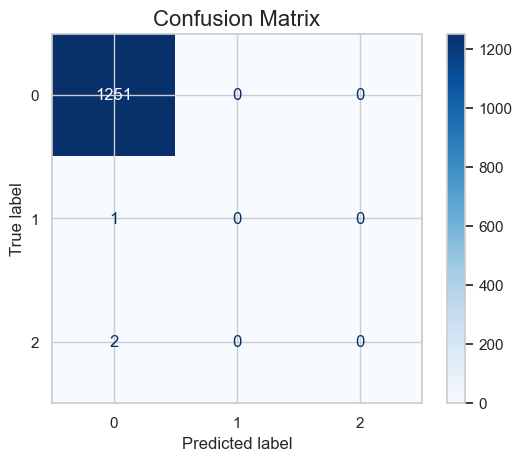

In [23]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
df = pd.read_csv('enterprise_station.csv')

# Prepare the data
X = df[['latitude', 'longitude']]  # Features
y = df['brand']  # Target variable

# Encode the target variable if necessary
y = pd.factorize(y)[0]  # Converts brands to numeric labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [25]:
pip install pandas matplotlib seaborn scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


C:\Users\l\anaconda3\python\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:08:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1251
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2

    accuracy                           1.00      1254
   macro avg       0.33      0.33      0.33      1254
weighted avg       1.00      1.00      1.00      1254



C:\Users\l\anaconda3\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\l\anaconda3\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\l\anaconda3\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1200x800 with 0 Axes>

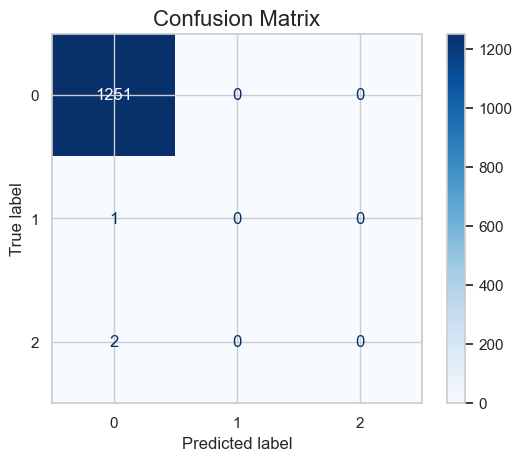

In [27]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb

# Load the dataset
df = pd.read_csv('enterprise_station.csv')

# Prepare the data
X = df[['latitude', 'longitude']]  # Features
y = df['brand']  # Target variable

# Encode the target variable if necessary
y = pd.factorize(y)[0]  # Converts brands to numeric labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [29]:
pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


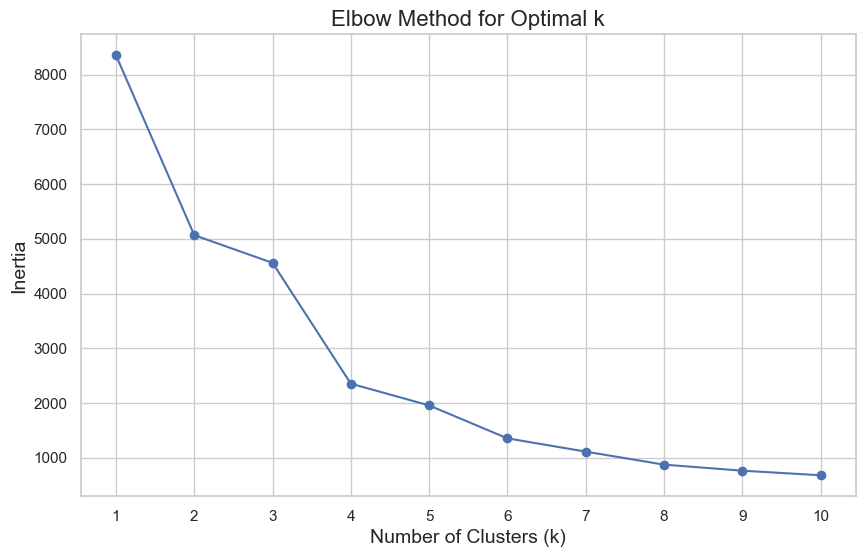

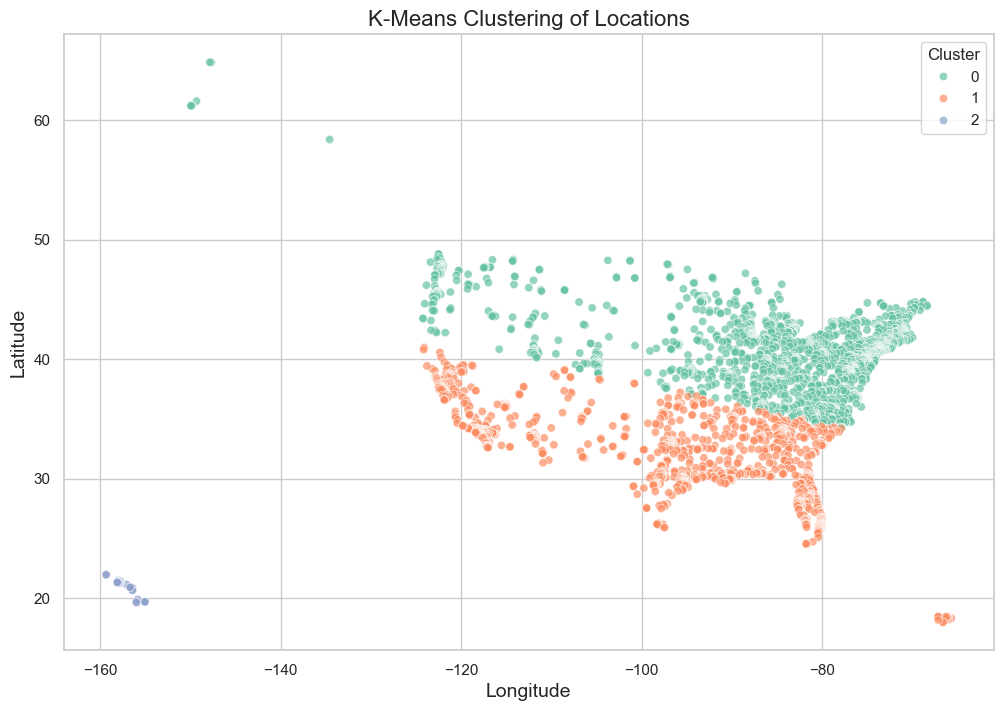

In [31]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('enterprise_station.csv')

# Prepare the data
X = df[['latitude', 'longitude']]  # Features

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.xticks(K)
plt.grid(True)
plt.show()

# Fit K-Means with the chosen number of clusters (e.g., k=3)
optimal_k = 3  # Change this based on the Elbow method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = y_kmeans

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='Cluster', palette='Set2', alpha=0.7)
plt.title('K-Means Clustering of Locations', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [33]:
pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1251
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2

    accuracy                           1.00      1254
   macro avg       0.33      0.33      0.33      1254
weighted avg       1.00      1.00      1.00      1254



C:\Users\l\anaconda3\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\l\anaconda3\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\l\anaconda3\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1200x800 with 0 Axes>

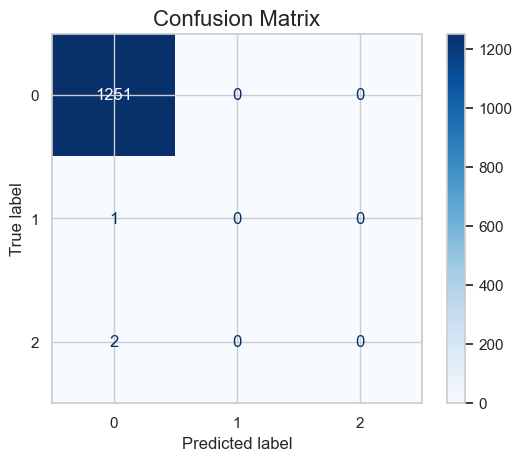

In [35]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('enterprise_station.csv')

# Prepare the data
X = df[['latitude', 'longitude']]  # Features
y = df['brand']  # Target variable

# Encode the target variable if necessary
y = pd.factorize(y)[0]  # Converts brands to numeric labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the KNN model
k = 5  # You can choose the value of k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix', fontsize=16)
plt.show()